# 22_Load_Fit_Lambda

This program demonstrates how to fit a complex data set using lambda function. In this case you use the lambda function to set some of the parameters of the function as constant, while you optimise the other parameters of the function to find the best fit.

### In this program we will first do the following things

- Import some libraries devoted to mathematics and numerical analysis
- Define some mathematical functions used later
- Plot those functions to have a basic tutorial on how to plot functions

### Then the main course comes with
- Load data from an '.npz' archive (typically a data file generated by an experiment and saved)
- Plot this data
- Fit this data using a lambda function

### Why lambda function ?
We could fit the function directly with the proper function, but then the algorithm will try to optimise all the parameters present in the function. Nonetheless, some of those parameters are fixed during the experiment, we need a way to numerically set them as constant so the algorithm does not try to optimise them and set them to values that are not in accordance with the experiment. Lambda functions allow to do this.

In [2]:
## Library imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
## Functions definitions

def lin(x,a,b):
    return a*x+b

def quad(x,a,b,c):
    return a*x**2 + b*x + c

def fluo_profile(t,v,K0,Gamma,delta,k,omega,phi):
    return K0*Gamma**2/4 / (Gamma**2/4 + (delta - k*v*np.cos(40*np.pi/180)*np.cos(omega*t-phi))**2)

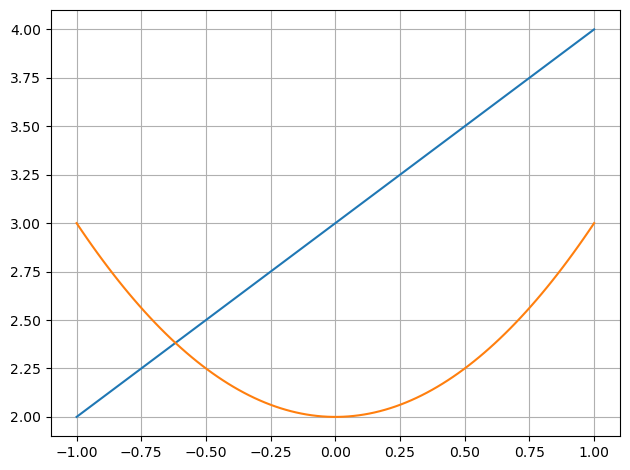

In [4]:
## Plot some of the functions
## defined above

x = np.linspace(-1,1,100)

plt.figure('linear')
plt.plot(x, lin(x,1,3))
plt.plot(x,quad(x,1,0,2))
plt.grid()
plt.tight_layout()

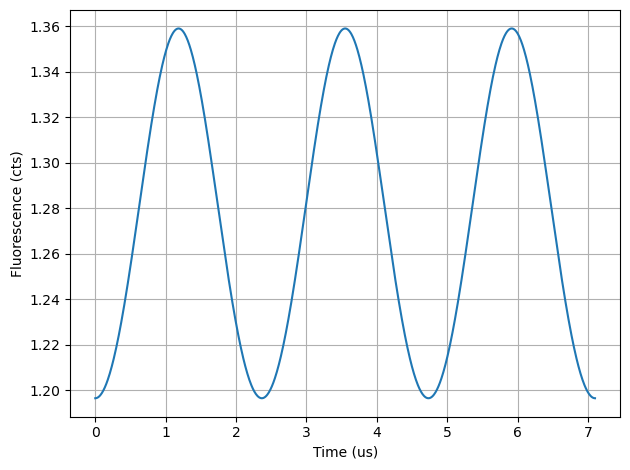

In [80]:
## Plot fluo vs time
## for single trapped ion

# define physical variables

v = 5
K0 = 1000
Gamma = 21.57*1e6*2*np.pi
delta = -14*Gamma
wavelength = 397.959140*1e-9
k = 2*np.pi/wavelength
omega = 422.5*1e3*2*np.pi
phi = 0

t = np.linspace(0,3/omega*(2*np.pi),1000)*1e6

# plot fluo_profile

plt.figure('fluo_Ca')

plt.plot(t, fluo_profile(t,v,K0,Gamma,delta,k,omega,phi))

plt.xlabel('Time (us)')
plt.ylabel('Fluorescence (cts)')
plt.grid()
plt.tight_layout()

In [43]:
## open data from REIN 240920
## 30 deg phase experiments

filename = 'fluo_histogram'
with np.load(filename+'.npz') as data:
    x = data['x']
    y = data['y']

[9.63890221e+00 2.63394286e+05 4.60636175e+00]
536776841.43967724
[3.11178186e-01 1.85851981e+06 3.46532484e-03]


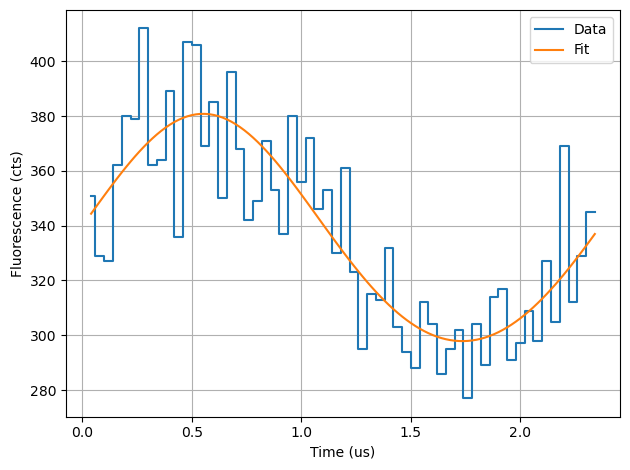

In [ ]:
## Plot and fit the data

# helper function
# Gamma,delta,k,omega are constant in this experiment
# v,K0,phi are variables to be adjusted by the curve_fit
# t is time

def fluo_profile_helper(Gamma,delta,k,omega):
    return lambda t,v,K0,phi : K0*Gamma**2/4 / (Gamma**2/4 + (delta - k*v*np.cos(40*np.pi/180)*np.cos(omega*t-phi))**2)

# This creates a new function where Gamma,delta,k,omega are set
# to constant values passed as arguments of fluo_profile_helper
f = fluo_profile_helper(Gamma,delta,k,omega)

# fit f given x and y
# initial guess p0
# bounds
# maxfev is the maximum number of iterations
popt, pcov = curve_fit(f,
                        x,
                        y,
                        p0=[10,100,np.pi],
                        bounds=([1e-3, 0,    0],
                                [500,  1e6, 2*np.pi]),
                            maxfev=10000)

# plot
plt.figure('fluo_hist')

# plot histogram data
plt.step(x*1e6,y,label='Data')
# plot the fitted function
plt.plot(x*1e6,f(x,*popt),label='Fit')

plt.xlabel('Time (us)')
plt.ylabel('Fluorescence (cts)')
plt.grid()
plt.tight_layout()
plt.legend()

# see the value of the fitted parameters
print(popt)
# the covariance
print(np.linalg.cond(pcov))
print(np.diag(pcov))